### H(0) : There is no significant difference in distress tolerance levels across the four survey waves.

### H(1) : There is a significant difference in distress tolerance levels across the four survey waves.

* sur21_n = I cannot cope with feeling distressed or sad.*
* sur22_n = Other people can withstand feelings of distress or sadness better than I can*
* sur23_n = Being distressed or sad is always a great ordeal for me.*
* sur24_n = Feelings of being distressed or sad scare me*
* sur25_n = I can do anything to not feel distressed or sad*
* sur26_n = When I'm feeling distressed or sad, I can't help but focus on how bad the distress really feels.*
* sur27_n = I have to get rid of the uncomfortable feelings very quickly, otherwise I cannot bear them*
* sur28_n = I cannot tolerate situations where I might feel sad*
* sur29_n = I cannot stand uncomfortable feelings*
* sur30_n = Being nervous scares me*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

wave1 = pd.read_csv('../Dataset/wave1.csv')
wave2 = pd.read_csv('../Dataset/wave2.csv')
wave3 = pd.read_csv('../Dataset/wave3.csv')
wave4 = pd.read_csv('../Dataset/wave4.csv')


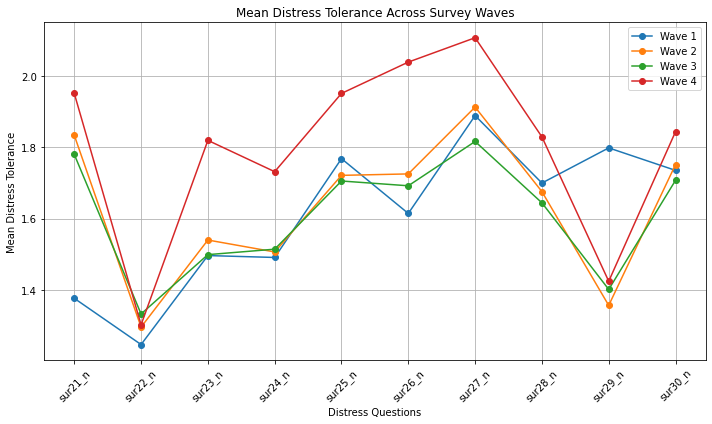

In [2]:
distress_question = ['sur21_n', 'sur22_n', 'sur23_n', 'sur24_n', 'sur25_n', 'sur26_n', 'sur27_n', 'sur28_n', 'sur29_n', 'sur30_n']

wave1_distress_mean = wave1[distress_question].mean()
wave2_distress_mean = wave2[distress_question].mean()
wave3_distress_mean = wave3[distress_question].mean()
wave4_distress_mean = wave4[distress_question].mean()

plt.figure(figsize=(10, 6))

# Plotting mean distress tolerance for each wave
plt.plot(wave1_distress_mean, label='Wave 1', marker='o')
plt.plot(wave2_distress_mean, label='Wave 2', marker='o')
plt.plot(wave3_distress_mean, label='Wave 3', marker='o')
plt.plot(wave4_distress_mean, label='Wave 4', marker='o')

# Adding labels and title
plt.title('Mean Distress Tolerance Across Survey Waves')
plt.xlabel('Distress Questions')
plt.ylabel('Mean Distress Tolerance')
plt.xticks(range(len(distress_question)), distress_question, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


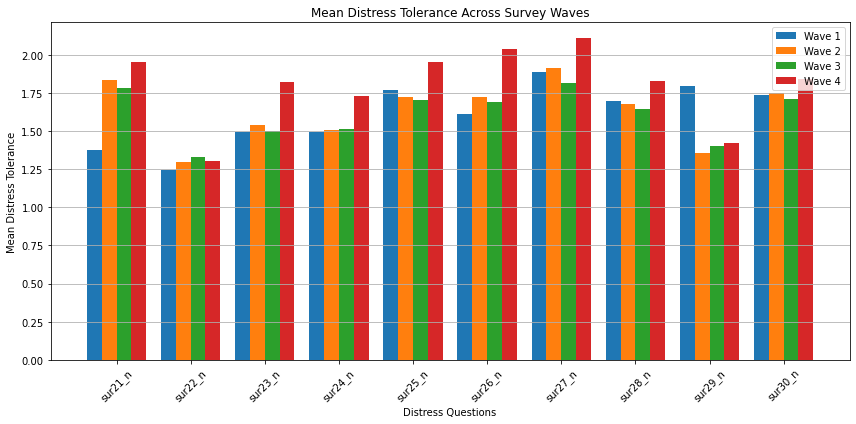

In [3]:
# Plotting
plt.figure(figsize=(12, 6))
index = np.arange(len(distress_question))
bar_width = 0.2
# Plotting mean distress tolerance for each wave using bar plots
plt.bar(index - bar_width * 1.5, wave1_distress_mean, bar_width, label='Wave 1')
plt.bar(index - bar_width * 0.5, wave2_distress_mean, bar_width, label='Wave 2')
plt.bar(index + bar_width * 0.5, wave3_distress_mean, bar_width, label='Wave 3')
plt.bar(index + bar_width * 1.5, wave4_distress_mean, bar_width, label='Wave 4')

# Adding labels and title
plt.title('Mean Distress Tolerance Across Survey Waves')
plt.xlabel('Distress Questions')
plt.ylabel('Mean Distress Tolerance')
plt.xticks(index, distress_question, rotation=45)
plt.legend()
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()


In [4]:
from scipy.stats import shapiro

# Iterate over each distress tolerance question column
for column in distress_question:
    # Perform Shapiro-Wilk test for normality
    stat_wave1, p_wave1 = shapiro(wave1[column])
    stat_wave2, p_wave2 = shapiro(wave2[column])
    stat_wave3, p_wave3 = shapiro(wave3[column])
    stat_wave4, p_wave4 = shapiro(wave4[column])

    # Print results
    print(f"Shapiro-Wilk Test for Normality ({column}):")
    print(f"Wave 1 - Statistic: {stat_wave1}, P-value: {p_wave1}")
    print(f"Wave 2 - Statistic: {stat_wave2}, P-value: {p_wave2}")
    print(f"Wave 3 - Statistic: {stat_wave3}, P-value: {p_wave3}")
    print(f"Wave 4 - Statistic: {stat_wave4}, P-value: {p_wave4}")
    # Determine normality based on p-value
    if p_wave1 > 0.05:
        print("Wave 1 data is normally distributed")
    else:
        print("Wave 1 data is not normally distributed")
    if p_wave2 > 0.05:
        print("Wave 2 data is normally distributed")
    else:
        print("Wave 2 data is not normally distributed")
    if p_wave3 > 0.05:
        print("Wave 3 data is normally distributed")
    else:
        print("Wave 3 data is not normally distributed")
    if p_wave4 > 0.05:
        print("Wave 4 data is normally distributed")
    else:
        print("Wave 4 data is not normally distributed")
    print("\n")


Shapiro-Wilk Test for Normality (sur21_n):
Wave 1 - Statistic: 0.8863048553466797, P-value: 5.7212406781346095e-28
Wave 2 - Statistic: 0.9047753810882568, P-value: 2.578315546422297e-24
Wave 3 - Statistic: 0.9026107788085938, P-value: 9.303983600569871e-18
Wave 4 - Statistic: 0.8991716504096985, P-value: 1.540839678071393e-10
Wave 1 data is not normally distributed
Wave 2 data is not normally distributed
Wave 3 data is not normally distributed
Wave 4 data is not normally distributed


Shapiro-Wilk Test for Normality (sur22_n):
Wave 1 - Statistic: 0.8602138161659241, P-value: 1.764952105612748e-30
Wave 2 - Statistic: 0.867686927318573, P-value: 4.579650999906423e-28
Wave 3 - Statistic: 0.8750932216644287, P-value: 4.451408489203616e-20
Wave 4 - Statistic: 0.8688511848449707, P-value: 2.594780510248307e-12
Wave 1 data is not normally distributed
Wave 2 data is not normally distributed
Wave 3 data is not normally distributed
Wave 4 data is not normally distributed


Shapiro-Wilk Test for 

In [5]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis test for distress tolerance questions across all waves
kruskal_results = {}
for column in distress_question:
    stat, p = kruskal(
                      wave1[column], wave4[column])
    kruskal_results[column] = {'Statistic': stat, 'P-value': p}

# Print Kruskal-Wallis test results
table_columns = []
for column, result in kruskal_results.items():
    res = ""
    if result['P-value'] < 0.05:
        res = "Reject null hypothesis: distributions are different"
    else:
        res = "Fail to reject null hypothesis: distributions are the same"

    table_columns.append({'Distress Question': column,
                         'Statistic': result['Statistic'], 'P-value': result['P-value'], 'Result': res})

# Convert to DataFrame
table_columns = pd.DataFrame(table_columns)
table_columns


,Distress Question,Statistic,P-value,Result
0,sur21_n,31.868797,1.649457e-08,Reject null hypothesis: distributions are diff...
1,sur22_n,0.437643,5.082624e-01,Fail to reject null hypothesis: distributions ...
2,sur23_n,9.833428,1.713686e-03,Reject null hypothesis: distributions are diff...
3,sur24_n,5.681014,1.714946e-02,Reject null hypothesis: distributions are diff...
4,sur25_n,3.157202,7.559262e-02,Fail to reject null hypothesis: distributions ...
5,sur26_n,15.881437,6.743693e-05,Reject null hypothesis: distributions are diff...
6,sur27_n,4.908466,2.672536e-02,Reject null hypothesis: distributions are diff...
7,sur28_n,2.095239,1.477586e-01,Fail to reject null hypothesis: distributions ...
8,sur29_n,12.487365,4.097137e-04,Reject null hypothesis: distributions are diff...
9,sur30_n,1.064798,3.021234e-01,Fail to reject null hypothesis: distributions ...


The Kruskal-Wallis test compares the median ranks of different groups to determine if there are statistically significant differences between the groups. 

For questions sur21_n, sur23_n, sur26_n, and sur29_n, the p-values are less than the significance level (typically 0.05), indicating that we reject the null hypothesis. This means that there are statistically significant differences between the distributions of distress scores across the waves for these questions.

For questions sur22_n, sur24_n, sur25_n, sur27_n, sur28_n, and sur30_n, the p-values are greater than the significance level, indicating that we fail to reject the null hypothesis. This means that there is not enough evidence to conclude that there are statistically significant differences between the distributions of distress scores across the waves for these questions. 

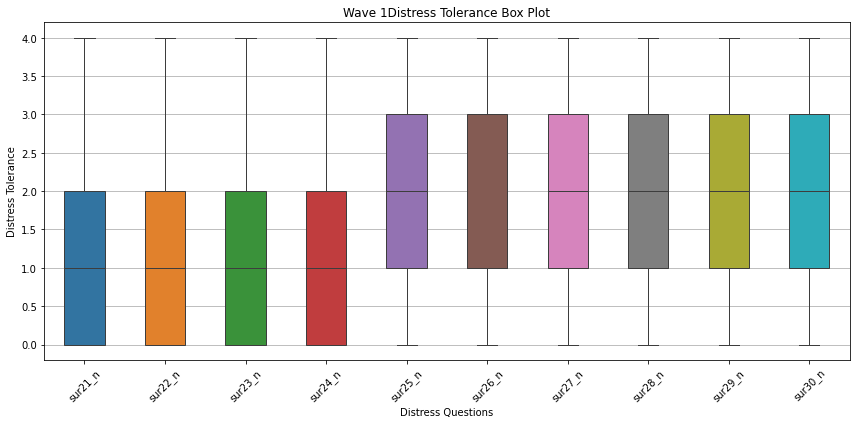

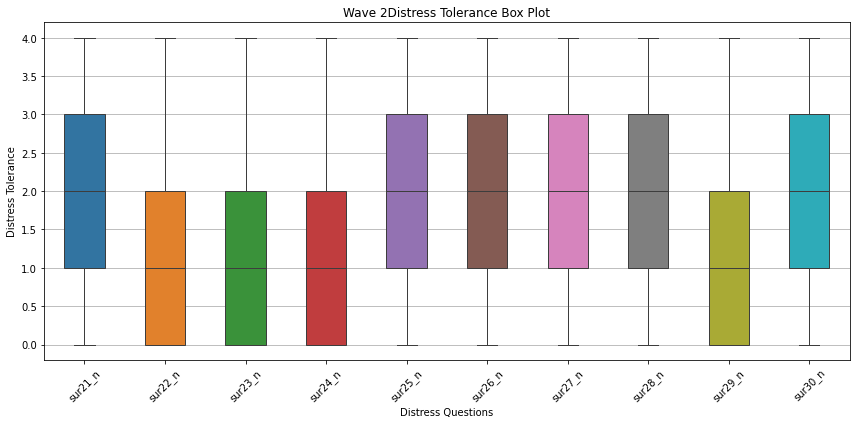

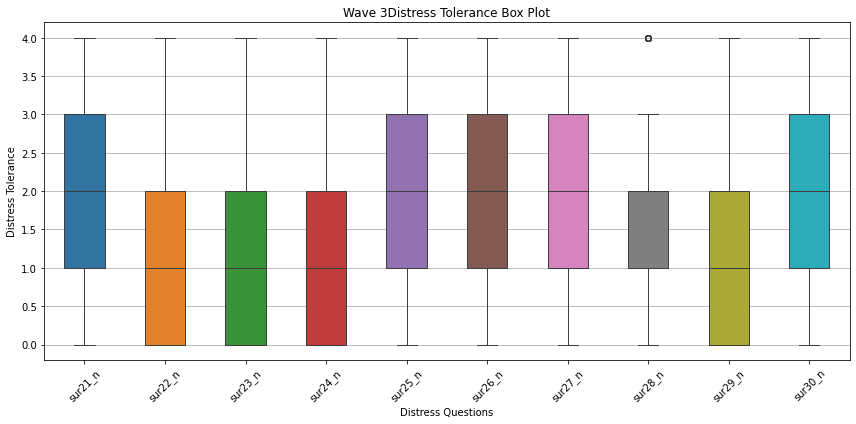

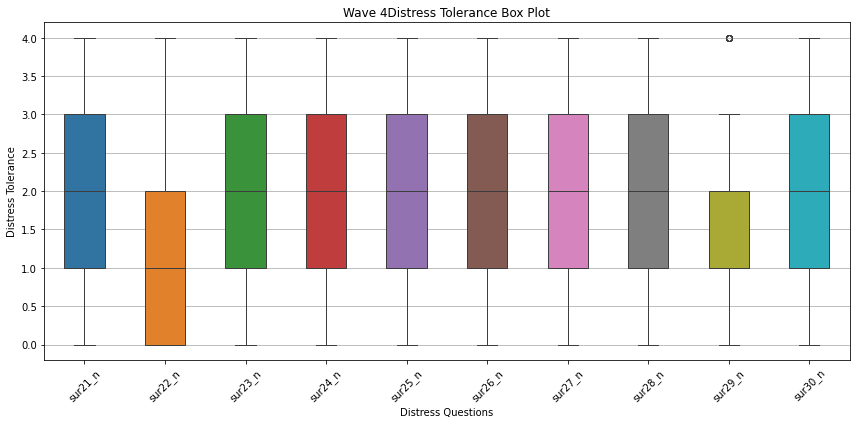

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# def plotBoxPlotAndViolinPlotForWaves(wave_data):
def plotBox(wave_data, ind):
    wave1_survey_data = wave_data[distress_question]
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=wave1_survey_data, orient='v', width=0.5)
    plt.title( 'Wave ' + ind + 'Distress Tolerance Box Plot')
    plt.ylabel('Distress Tolerance')
    plt.xlabel('Distress Questions')
    plt.xticks(range(len(distress_question)), distress_question, rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plotBox(wave1,"1" )
plotBox(wave2,"2")
plotBox(wave3,"3")
plotBox(wave4,"4")


In [7]:
from scipy.stats import kruskal
imp_columns = ['sur21_n', 'sur23_n', 'sur26_n']
diff_columns = ['sur22_n', 'sur24_n', 'sur25_n', 'sur27_n', 'sur28_n', 'sur30_n']
wave1['sumImp'] = wave1[imp_columns].sum(axis=1)
wave2['sumImp'] = wave2[imp_columns].sum(axis=1)
wave3['sumImp'] = wave3[imp_columns].sum(axis=1)
wave4['sumImp'] = wave4[imp_columns].sum(axis=1)

wave1['sumDiff'] = wave1[diff_columns].sum(axis=1)
wave2['sumDiff'] = wave2[diff_columns].sum(axis=1)
wave3['sumDiff'] = wave3[diff_columns].sum(axis=1)
wave4['sumDiff'] = wave4[diff_columns].sum(axis=1)

column = 'sumImp'
stat, p = kruskal(wave1[column], wave2[column],
                    wave3[column], wave4[column])

print(f"Kruskal-Wallis Test for {column}:")
print(f"Statistic: {stat}, P-value: {p}")


if p < 0.05:
    res = "Reject null hypothesis: distributions are different"
else:
    res = "Fail to reject null hypothesis: distributions are the same"
print(res)

Kruskal-Wallis Test for sumImp:
Statistic: 32.2904944906226, P-value: 4.5452703914052556e-07
Reject null hypothesis: distributions are different


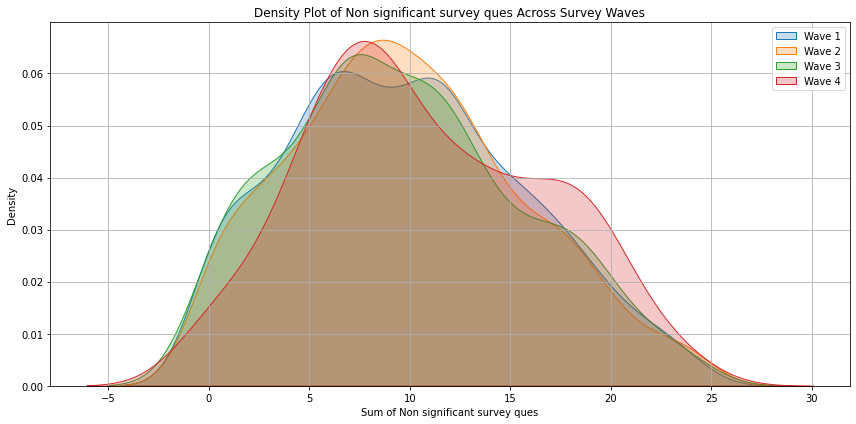

In [8]:
# plot for surB for all waves
plt.figure(figsize=(12, 6))
for i, wave in enumerate([wave1, wave2, wave3, wave4]):
    sns.kdeplot(wave['sumDiff'], label=f'Wave {i+1}', fill=True)
plt.title('Density Plot of Non significant survey ques Across Survey Waves')
plt.xlabel('Sum of Non significant survey ques')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


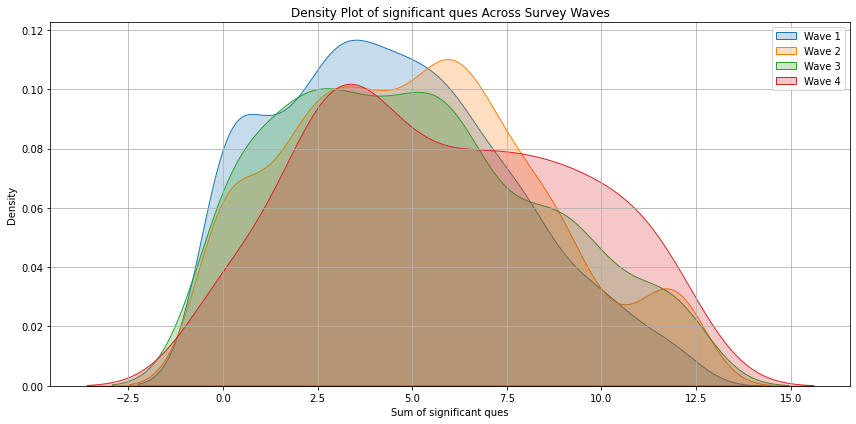

In [9]:
# plot for surB for all waves
plt.figure(figsize=(12, 6))
for i, wave in enumerate([wave1, wave2, wave3, wave4]):
    sns.kdeplot(wave['sumImp'], label=f'Wave {i+1}', fill=True)
plt.title('Density Plot of significant ques Across Survey Waves')
plt.xlabel('Sum of significant ques')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
